# 비지도 변환

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

cancer = load_breast_cancer()

x = pd.DataFrame(cancer.data, columns=cancer.feature_names) # input data
y = pd.DataFrame(cancer.target, columns=['class']) # target data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

print(x_train.shape)
print(x_test.shape)

(455, 30)
(114, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [18]:
x_train_scaled = scaler.transform(x_train)

print("스케일 변환 전 크기:",  x_train.shape)
print("스케일 변환 후 크기:",  x_train_scaled.shape)
print("스케일 변환 전 최대값:", x_train.max(axis =0).values)
print("스케일 변환 전 최소값:", x_train.min(axis =0).values)
print("스케일 변환 후 최소값:", x_train_scaled.min(axis =0))
print("스케일 변환 후 최대값:", x_train_scaled.max(axis =0))

스케일 변환 전 크기: (455, 30)
스케일 변환 후 크기: (455, 30)
스케일 변환 전 최대값: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 변환 전 최소값: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 변환 후 최소값: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 변환 후 최대값: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [19]:
x_test_scaled = scaler.transform(x_test)
print("스케일 변환 후 최소값:", x_test_scaled.min(axis =0))
print("스케일 변환 후 최대값:", x_test_scaled.max(axis =0))

스케일 변환 후 최소값: [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.05140789
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00837606
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.0238723   0.00664013  0.02660975  0.09008529  0.02031974  0.00943767
  0.11259328  0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 변환 후 최대값: [0.9578778  0.67974298 0.95577362 0.89353128 0.81132075 0.89571192
 0.74718838 0.9333996  0.77626263 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.62943491 0.76717172 0.62928585
 0.72165795 0.39057253 0.89612238 0.76385928 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_scaled = scaler.transform(x_train)

In [22]:
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC(gamma ='auto')
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.6293706293706294

In [23]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

svm.fit(x_train_scaled, y_train)
svm.score(x_test_scaled, y_test)

0.951048951048951

# 군집

In [58]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples =100,
                  n_features = 2, 
                  centers = 5,
                  random_state=10)

print(x.shape)
print(y.shape)

(100, 2)
(100,)


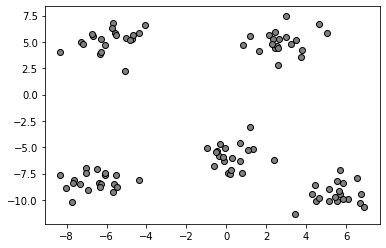

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1],
            c = 'gray',
            edgecolor= 'black',
            marker = 'o')
plt.show()

In [73]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=5,
             random_state = 0)
kmc.fit(x)

label_kmc = kmc.labels_
print(label_kmc)

[3 1 0 2 4 3 3 0 4 3 0 3 4 2 4 3 1 2 4 3 3 2 1 0 3 3 2 4 0 1 2 2 4 2 3 4 0
 2 0 1 2 2 2 4 0 0 3 4 1 4 1 4 3 0 4 4 2 1 2 0 4 1 1 2 3 1 4 1 4 0 0 3 1 4
 2 2 0 1 3 3 4 4 1 2 1 0 2 0 2 0 1 0 3 1 1 1 0 3 3 0]


In [76]:
import pandas as pd
kmc_columns = ['x', 'y']
x_kmc_df = pd.DataFrame(x, columns = kmc_columns)
x_kmc_df['target'] = y
x_kmc_df['label_kmc'] = label_kmc
x_kmc_df

,x,y,target,label_kmc
0,-5.577854,5.872988,3,3
1,1.627832,4.178069,1,1
2,-6.950884,-9.024594,4,0
3,-0.952769,-5.034316,2,2
4,6.550104,-7.912339,0,4
...,...,...,...,...
95,3.719148,3.557522,1,1
96,-7.697481,-8.356274,4,0
97,-6.745814,5.757279,3,3
98,-5.096242,2.231017,3,3


In [77]:
print(set(x_kmc_df['target']))
print(set(x_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


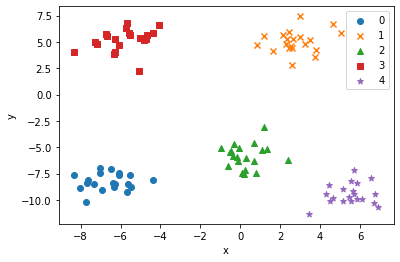

In [83]:
# k-means clustering을 이용한 데이터 플랏
df = x_kmc_df.copy()
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['x']
    X2 = df_i['y']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

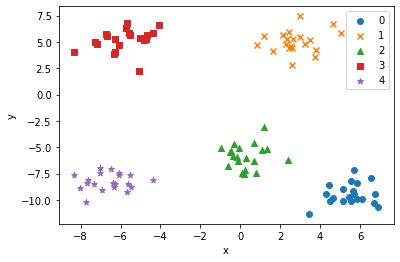

In [84]:
# 실제 정답
df = x_kmc_df.copy()
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['x']
    X2 = df_i['y']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Q. iris data를 활용하여 k-means clustering을 수행하고 실제 데이터와 비교해보자(2시 20분까지)

In [85]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
Y = pd.DataFrame(iris_data.target, columns = ['class'])

In [103]:
#
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=3,
             random_state = 0)
kmc.fit(X)

label_kmc = kmc.labels_
print(label_kmc) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [105]:
import pandas as pd
X['target'] = Y
X['label_kmc'] = label_kmc
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label_kmc
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [106]:
print(X['target'].unique())
print(X['label_kmc'].unique())

[0 1 2]
[1 0 2]


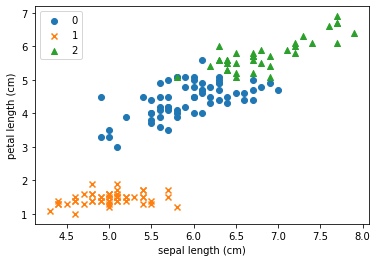

In [107]:
# k-means clustering을 이용한 데이터 플랏
df = X.copy()
markers=['o','x','^']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['sepal length (cm)']
    X2 = df_i['petal length (cm)']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()

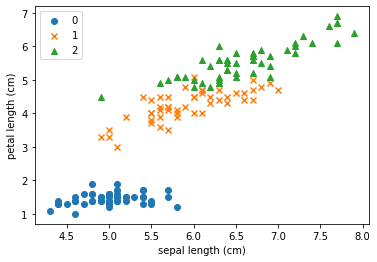

In [108]:
# 실제 정답
df = X.copy()
markers=['o','x','^']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['sepal length (cm)']
    X2 = df_i['petal length (cm)']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()